### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025
# **Tarea Semanal 7**: *Transformada Z y Respuesta en Frecuencia*
#### Mora Taranilla y Victoria Jazmín Salgado

## **Resumen**:
En esta Tarea Semanal se trabajó con ecuaciones en diferencias. Se calculó su función transferencia y a partir de la misma, la respuesta en frecuencia de módulo y de fase. 
Se verificaron los resultados obtenidos de manera computacional. 

## **Introducción Teórica**
Las ecuaciones en diferencias son una herramienta fundamental para describir y modelar sistemas Lineales Invariantes en el Tiempo (LTI), en el dominio del tiempo discreto. 
Su forma general es la siguiente: 
$$y(n) = \sum_{i}x(n-i)\cdot b_i + \sum_{i}y(n-i)\cdot a_i$$

A partir de su estructura, es posible clasificar los sistemas: si la salida $y(n)$ solo depende de las entradas $x(n)$ (actuales y pasadas), se trata de un sistema de Respuesta Finita al Impulso (FIR), y los coeficiones $a_i$ serán iguales a 0. Si, en cambio, la salida $y(n)$ depende también de salidas anteriores (es decir, posee términos recursivos), el sistema es de Respuesta Infinita al Impulso (IIR).

Para analizar estos sistemas en el dominio de la frecuencia, se usa la **Transformada Z**. La ventaja de esta transformada es que, gracias a la propiedad de traslación temporal (donde un retardo $x(n-k)$ se convierte en $z^{-k}X(Z)$), la ecuación en diferencias se convierte en una ecuación algebraica, a partir de la cual es posible obtener la funcion transferencia como $T(Z) =\frac{Y(Z)}{X(Z)}$. 

El análisis de $T(Z)$ revela características fundamentales del sistema. Las raíces del numerador se denominan ceros, mientras que las raíces del denominador se denominan polos. La ubicación de estos polos en el plano Z es crucial, ya que determina la estabilidad del sistema (un sistema es estable si todos sus polos se encuentran dentro del círculo unitario).

Finalmente, para obtener la respuesta en frecuencia del sistema, se evalúa la Función de Transferencia $T(Z)$ sobre el círculo unitario, realizando la sustitución $z = e^{j\omega}$. Esto resulta en la función $T(e^{j\omega})$, de la cual es posible calcular su módulo $|T(e^{j\omega})|$ y su fase $\angle T(e^{j\omega})$ para cada frecuencia $\omega$.

## **Desarrollo y Análisis**

Dadas las siguientes ecuaciones en diferencias, que representan un filtro de media móvil: 
1. $y(n) = x(n-3) + x(n-2) + x(n-1) + x(n)$
2. $y(n) = x(n-4) + x(n-3) + x(n-2) + x(n-1) + x(n)$
3. $y(n) = x(n) - x(n-1)$
4. $y(n) = x(n) - x(n-2)$

Se desea:
- Hallar la función transferencia $T(Z) =\frac{Y(Z)}{X(Z)}$
- Calcular la respuesta en frecuencia de módulo y fase
- Simular y validar la respuesta en frecuencia de todos los sistemas en Python.

**Sistema 1**
A partir de la ecuación en diferencias, se calculó la transformada Z. 
$$
Y(Z)= z^{-3}\cdot X(Z) + z^{-2}\cdot X(Z) + z^{-1}\cdot X(Z) + z^{-0}\cdot X(Z)
$$
Al dividir a ambos lados por $X(Z)$, se obtiene la función transferencia $T(Z)$
$$
T(Z)=\frac{Y(Z)}{X(Z)} = z^{-3}+z^{-2}+z^{-1}+z^{-0}
$$

Para identificar la distribución de polos y ceros de la función transferencia en el plano Z, se toma como factor común el exponente con mayor grado, en este caso, $z^{-3}$, obteniendo finalmente:

$$
T(Z) = (z^{3}+z^{2}+z^{1}+z^{0}) \cdot z^{-3} = \frac{z^{3}+z^{2}+z^{1}+z^{0}}{z^{3}}
$$

Frente a esta representación, se puede observar que la función cuenta con tres polos en el origen y tres ceros que se ubican en $z = \{-1,-j,j\}$.

Una vez obtenida la función transferencia, se procede por el cálculo de su respuesta en frecuencia, tanto en módulo como fase. Para ello, se evalúa la función en $z = e^{j\Omega}$.

$$
T(e^{j\Omega}) = e^{j0}+e^{-j\Omega}+e^{-2j\Omega}+e^{-3j\Omega}
$$

Se procede a sacar como factor común el punto medio entre los exponentes, obteniendo la siguiente expresión:

$$
T(e^{j\Omega}) = T(j\Omega) = e^{\frac{-j3\Omega}{2}}(e^{\frac{j3\Omega}{2}}+e^{\frac{j\Omega}{2}}+e^{\frac{-j\Omega}{2}}+e^{\frac{-j3\Omega}{2}})
$$

Utilizando la expresión de Euler para el coseno ($cos(\alpha) = \frac{e^{j\alpha} + e^{-j\alpha}}{2}$), se pueden reemplazar los siguientes términos:

- $e^{\frac{j\Omega}{2}}+e^{\frac{-j\Omega}{2}} = 2 cos(\frac{j\Omega}{2})$
- $e^{\frac{j3\Omega}{2}}+e^{\frac{-j3\Omega}{2}} = 2 cos(\frac{j3\Omega}{2})$

Obteniendo finalmente:

$$
T(j\Omega) = 2 e^{\frac{-j3\Omega}{2}} (cos(\frac{j3\Omega}{2}) + cos(\frac{j\Omega}{2}))
$$

A partir de la expresión obtenida, se observa que la fase presenta una dependencia lineal con la frecuencia, dada por la siguiente fórmula: $$\angle T = \frac{-3\Omega}{2}$$

Se obtiene la respuesta en frecuencia de módulo al aplicar dicho operador sobre la expresión.

$$
|T(j\Omega)| = |2 e^{\frac{-j3\Omega}{2}} (cos(\frac{j3\Omega}{2}) + cos(\frac{j\Omega}{2}))| =  2 |cos(\frac{j3\Omega}{2}) + cos(\frac{j\Omega}{2})|
$$

Para observar un comportamiento aproximado, se calcularon valores del módulo para algunas frecuencias. 

- $\Omega = 0 \rightarrow |T(0)| = 2 |cos(0) + cos(0)| = 4$
- $\Omega = \pi/4 \rightarrow |T(j\pi/4)| = 2 |cos(3\pi/8) + cos(\pi/8)| \approx 2.61$
- $\Omega = \pi/2 \rightarrow |T(j\pi/2)| = 2 |cos(3\pi/4) + cos(\pi/4)| = 0$
- $\Omega = 3\pi/4 \rightarrow |T(j3\pi/4)| = 2 |cos(9\pi/8) + cos(3\pi/8)| \approx 1.08$
- $\Omega = \pi \rightarrow |T(j\pi)| = 2 |cos(3\pi/2) + cos(\pi/2)| = 0$

A continuación, se lleva a cabo el cálculo de la respuesta en frecuencia a partir de la función transferencia con la librería de Scipy: *scipy.signal*. Utilizando la función *freqz*, se ingresan los valores de los coeficientes *b* y *a* del sistema y el eje deseado para la respuesta, y devuelve dos vectores: las frecuencias $\Omega$ y el valor de la respuesta en frecuencia del sistema. A partir de los mismos, se grafica su módulo y fase. 

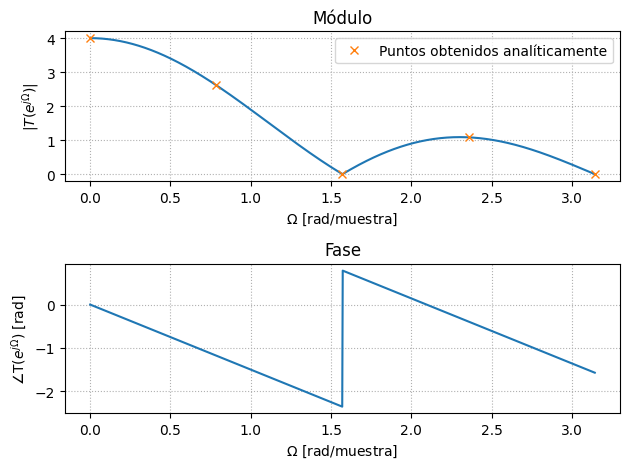

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 

# Módulo calculado a mano
Omega = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
modulo = [4, 2.61, 0, 1.08, 0]

# Obtenido con signal
a = [1]
b = [1,1,1,1]

w, h = signal.freqz(b = b, a = a, worN = np.linspace(0, np.pi, 1000))
phase = np.angle(h, deg=False)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w, abs(h))
plt.plot(Omega, modulo, 'x', label='Puntos obtenidos analíticamente') 
plt.title('Módulo')
plt.xlabel('$\Omega$ [rad/muestra]')
plt.ylabel('|$T(e^{j\Omega})$|')
plt.grid(True, which='both', ls=':')
plt.legend()

# Fase
plt.subplot(2,1,2)
plt.plot(w, phase)
plt.title('Fase')
plt.xlabel('$\Omega$ [rad/muestra]')
plt.ylabel('∠T($e^{j\Omega})$ [rad]')
plt.grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()

A partir de los resultados, se verifica que los resultados obtenidos de forma analítica son correctos.

**Sistema 2**
Se comienza por calcular la transformada Z para todos los términos de la ecuación, haciendo uso de la propiedad de traslación. 
La ecuación transformada quedará como:
$$
Y(Z)=z^{-4}\cdot X(Z) + z^{-3}\cdot X(Z) + z^{-2}\cdot X(Z) + z^{-1}\cdot X(Z) + X(Z)
$$
Se procede a despejar $Y(Z)$ y $X(Z)$, obteniendo 
$$
Y(Z) = X(Z)\cdot(z^{-4}+z^{-3}+z^{-2}+z^{-1}+1)
$$
Finalmente, 
$$
T(Z)=\frac{Y(Z)}{X(Z)} = z^{-4}+z^{-3}+z^{-2}+z^{-1}+1
$$

Una vez que se cuenta con la función transferencia se, se multiplica y divide por el término de mayor orden pero con signo positivo, en este caso $z^{4}$, de la siguiente manera:
$$
(z^{-4}+z^{-3}+z^{-2}+z^{-1}+1)\cdot\frac{z⁴}{z⁴} 
$$
Obteniendo una expresión más simple para el cálculo de raíces de los polinomios numerador y denominador.
$$
T(z)=\frac{1+z+z²+z³+z⁴}{z⁴}
$$

Luego, se procede a calcular la respuesta en módulo y fase. 
Para ello, se evalúa T(z) para $z = 1e^{j\Omega}$. Se tiene:
$$e^{j0}+e^{-j\Omega}+e^{-2j\Omega}+e^{-3j\Omega}+e^{-4j\Omega}$$
Se continúa por sacar como factor comun el término medio, para poder usar la identidad de Euler que define el coseno como $\cos{\Omega}=\frac{e^{j\Omega} + e^{-j\Omega}}{2}$ $(ec.X)$, luego $2\cos{\Omega}=e^{j\Omega} + e^{-j\Omega}$. 

Entonces
$$T(j\Omega) = e^{-2j\Omega}\cdot(1+e^{j\Omega}+e^{-j\Omega}+e^{2j\Omega}+e^{-2j\Omega})$$ 
y usando ec.X 
$$T(j\Omega) = e^{-2j\Omega}\cdot(1+2\cos{\Omega}+2\cos{2\Omega})$$ 

A partir de esta expresión algebraica será posible encontrar la respuesta en frecuencia de módulo y fase.
- Respuesta en frecuencia de módulo:
  $$|T(j\Omega)| = |e^{-2j\Omega}\cdot(1+2\cos{\Omega}+2\cos{2\Omega})| = \underbrace{|e^{-2j\Omega}|}_{=1}\cdot|(1+2\cos{\Omega}+2\cos{2\Omega})|$$
  Esta expresión se evaluará en diferentes frecuencias $\Omega$, para poder obtener un comportamiento aproximado del sistema. Se elijen 5 puntos entre 0 y Nyquist:
  - $\Omega=0 \rightarrow |T(j0)|= |1+2\cos{(0)}+2\cos{(2\cdot0)}| = 5$
  - $\Omega=\frac{\pi}{4} \rightarrow |T(j\frac{\pi}{4})|= |1+2\cos{(\frac{\pi}{4})}+2\cos{(2\cdot\frac{\pi}{4})}| = 1+\sqrt{2} \approx 2,41$
  - $\Omega=\frac{\pi}{2} \rightarrow |T(j\frac{\pi}{2})|= |1+2\cos{(\frac{\pi}{2})}+2\cos{(2\cdot\frac{\pi}{2})}| = 1$
  - $\Omega=\frac{3\pi}{4} \rightarrow |T(j\frac{3\pi}{4})|= |1+2\cos{(\frac{3\pi}{4})}+2\cos{(2\cdot\frac{3\pi}{4})}| \approx 0,41$
  - $\Omega=\pi \rightarrow |T(j\pi)|= |1+2\cos{(\pi)}+2\cos{(2\cdot\\pi)}| = 1$

A partir de estos valores, se realiza un gráfico para observar el comportamiento de manera VER

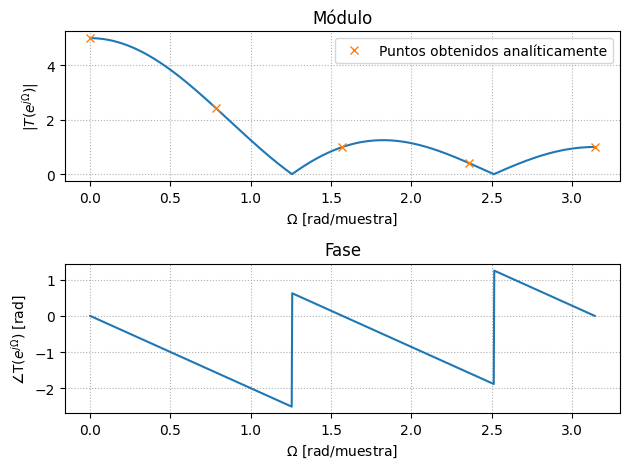

In [9]:
# Módulo calculado a mano
modulo_2 = [5, 1+np.sqrt(2), 1, 0.41, 1]

# Simulado 
a = [1]
b = [1,1,1,1,1]

w, h = signal.freqz(b = b, a = a, worN = np.linspace(0, np.pi, 1000))
phase = np.angle(h, deg=False)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w, abs(h))
plt.plot(Omega, modulo_2, 'x', label='Puntos obtenidos analíticamente') 
plt.title('Módulo')
plt.xlabel('$\Omega$ [rad/muestra]')
plt.ylabel('|$T(e^{j\Omega})$|')
plt.grid(True, which='both', ls=':')
plt.legend()

# Fase
plt.subplot(2,1,2)
plt.plot(w, phase)
plt.title('Fase')
plt.xlabel('$\Omega$ [rad/muestra]')
plt.ylabel('∠T($e^{j\Omega})$ [rad]')
plt.grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()

**Sistema 3**
Se procede de igual forma que los sistemas anteriores, calculando en un primer momento la transformada Z de la ecuación y obteniendo la función transferencia.
$$T(Z) = \frac{Y(Z)}{X(Z)} = z^{-0} - z^{-1} = z^{-1} (z^1 - 1) = \frac{z-1}{z}$$

Se puede deducir de la función transferencia que se tiene un polo en el origen y un cero en $z = 1$. Se evaluó la misma en $z = e^{j\Omega}$, para poder obtener la respuesta en frecuencia de módulo y fase.

$$
T(e^{j\Omega}) = T(j\Omega) = e^{-j0} - e^{-j\Omega}
$$

Realizando el mismo procedimiento, se saca factor común en el punto medio de ambos exponentes, en este caso $e^{-j\Omega/2}$, y utilizando la  definición de Euler para el seno ($2j sen(\alpha) = e^{j\alpha} - e^{-j\alpha}$), se obtiene la siguiente expresión:

$$
T(j\Omega) = e^{-j\Omega/2} \cdot 2j sen(\Omega/2)
$$

Respuesta de módulo:
Al tomar módulo, se obtiene que

$$
|T(j\Omega)| = |e^{-j\Omega/2} \cdot 2j sen(\Omega/2)| = \underbrace{|e^{-j\Omega/2}|}_{=1} 2 |sen(\Omega/2)| = 2|sen(\Omega/2)|
$$

Se evalúa la expresión para algunos valores de $\Omega$ para observar el comportamiento:

- $\Omega = 0 \rightarrow |T(0)| = 2 |sen(0)| = 0$
- $\Omega = \pi/8 \rightarrow |T(j\pi/8)| = 2 |sen(\pi/16)| \approx 0.39$
- $\Omega = \pi/4 \rightarrow |T(j\pi/4)| = 2 |sen(\pi/8)| \approx 0.77$
- $\Omega = 3\pi/8 \rightarrow |T(j3\pi/8)| = 2 |sen(3\pi/16)| \approx  1.11$
- $\Omega = \pi/2 \rightarrow |T(j\pi/2)| = 2 |sen(\pi/4)| \approx 1.41$
- $\Omega = 5\pi/8 \rightarrow |T(j5\pi/8)| = 2 |sen(5\pi/16)| \approx  1.66$
- $\Omega = 3\pi/4 \rightarrow |T(j3\pi/4)| = 2 |sen(3\pi/8)| \approx 1.85$
- $\Omega = 7\pi/8 \rightarrow |T(j7\pi/8)| = 2 |sen(7\pi/16)| \approx  1.96$
- $\Omega = \pi \rightarrow |T(j\pi)| = 2 |sen(\pi/2)| = 2$

Respuesta de fase:
Se puede ver en este caso que corresponde a una dependencia lineal que sigue la forma de $\angle T = -\Omega/2$

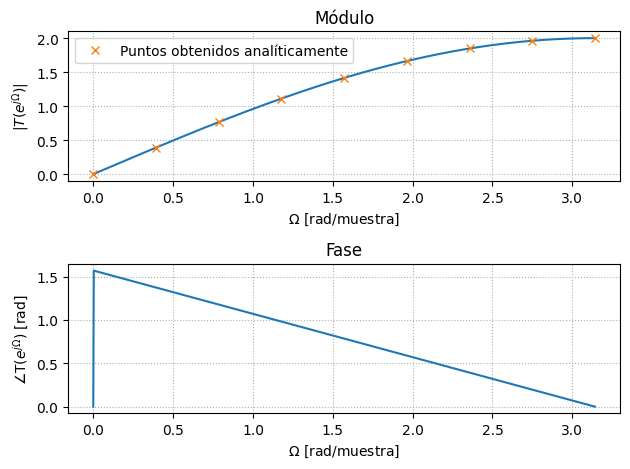

In [4]:
# Módulo calculado a mano
Omega = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4, 7*np.pi/8, np.pi]
modulo = [0, 0.39, 0.77, 1.11, 1.41, 1.66, 1.85, 1.96, 2]

# Obtenido con signal
a = [1]
b = [1,-1]

w, h = signal.freqz(b = b, a = a, worN = np.linspace(0, np.pi, 1000))
phase = np.angle(h, deg=False)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w, abs(h))
plt.plot(Omega, modulo, 'x', label='Puntos obtenidos analíticamente') 
plt.title('Módulo')
plt.xlabel('$\Omega$ [rad/muestra]')
plt.ylabel('|$T(e^{j\Omega})$|')
plt.grid(True, which='both', ls=':')
plt.legend()

# Fase
plt.subplot(2,1,2)
plt.plot(w, phase)
plt.title('Fase')
plt.xlabel('$\Omega$ [rad/muestra]')
plt.ylabel('∠T($e^{j\Omega})$ [rad]')
plt.grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()

**Sistema 4:** 
Luego de aplicar la transformada Z, la ecuación quedará como
$$Y(Z) = X(Z)-Z^{-2}\cdot X(Z) = X(Z)\cdot(1-Z^{-2})$$
A partir de cual se puede despejar la Función Transferencia:
$$T(Z)=\frac{Y(Z)}{X(Z)}=1-Z^{-2}$$
y multiplicando y diviendo por el término de mayor orden pero con signo positivo, 
$$T(Z)=1-Z^{-2}=1-Z^{-2}\cdot\frac{z²}{z²} = \frac{z²-1}{z²}$$

Se procede a calcular la respuesta en frecuencia de módulo y fase, llevando a cabo el procedimiento anterior. 
Se evalúa la función transferencia en $Z=1e^{j\Omega}$, obteniendo $T(j\Omega)=e^{j\Omega}-e^{-2j\Omega}$ y sacando factor comun, se tiene $T(j\Omega) = e^{-j\Omega}\cdot(e^{j\Omega}-e^{-j\Omega})$.
En este caso se buscará usar la identidad de Euler que define el seno como $\sin{\Omega}=\frac{e^{j\Omega} - e^{-j\Omega}}{2j}$ $(ec.X)$, luego $2j\sin{\Omega}=e^{j\Omega} - e^{-j\Omega}$. 

Se obtiene la siguiente expresión:
$$T(j\Omega) = e^{-j\Omega}\cdot{2j\sin{\Omega}}$$

Se calcula entonces
- Respuesta en Frecuencia de módulo:
  Se toma módulo a la expresión algebraica: 
  $$|T(j\Omega)| = \underbrace{|e^{-j\Omega}|}_{=1}\cdot|{2j\sin{\Omega}}|$$
  Esta expresión se evaluará en diferentes frecuencias $\Omega$, para poder obtener un comportamiento aproximado del sistema. Se elijen 5 puntos entre 0 y Nyquist:
  - $\Omega=0 \rightarrow |T(j0)|= |2j\sin{(0)}| = 0$
  - $\Omega=\frac{\pi}{4} \rightarrow |T(j\frac{\pi}{4})|= |2j\sin{(\frac{\pi}{4})}| = \sqrt{2} \approx 1,41$
  - $\Omega=\frac{\pi}{2} \rightarrow |T(j\frac{\pi}{2})|= |2j\sin{(\frac{\pi}{2})}| = 2$
  - $\Omega=\frac{3\pi}{4} \rightarrow |T(j\frac{3\pi}{4})|= |2j\sin{(\frac{3\pi}{4})}| = \sqrt{2} \approx 1,41$
  - $\Omega=\pi \rightarrow |T(j\pi)|= |2j\sin{(\pi)}| = 0$
  

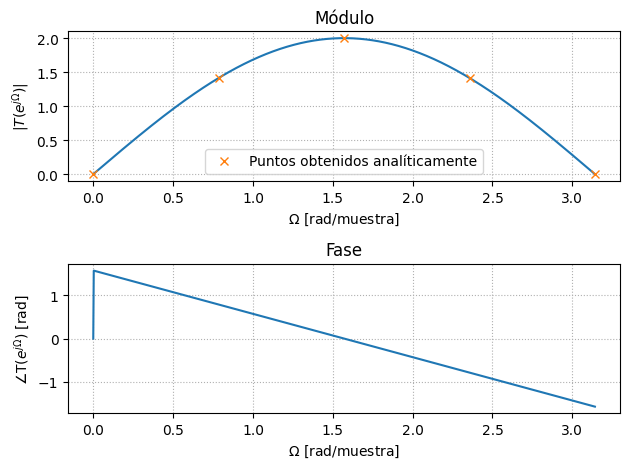

In [11]:
# Módulo calculado a mano
modulo_4 = [0, np.sqrt(2), 2, np.sqrt(2), 0]

# Simulado 
a = [1]
b = [1, 0, -1]

w, h = signal.freqz(b = b, a = a, worN = np.linspace(0, np.pi, 1000))
phase = np.angle(h, deg=False)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w, abs(h))
plt.plot(Omega, modulo_4, 'x', label='Puntos obtenidos analíticamente') 
plt.title('Módulo')
plt.xlabel('$\Omega$ [rad/muestra]')
plt.ylabel('|$T(e^{j\Omega})$|')
plt.grid(True, which='both', ls=':')
plt.legend()

# Fase
plt.subplot(2,1,2)
plt.plot(w, phase)
plt.title('Fase')
plt.xlabel('$\Omega$ [rad/muestra]')
plt.ylabel('∠T($e^{j\Omega})$ [rad]')
plt.grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()

## **Conclusiones**
En este trabajo se logró aplicar de manera satisfactoria la transformada Z y la propiedad de la traslación para obtener la función transferencia en el dominio Z de diversas ecuaciones en diferencias. A partir de los resultados, se calculó la respuesta en frecuencia de los sistemas, tanto en módulo como fase.

Posteriormente, los sistemas fueron implementados utilizando  funciones de *scipy.signal* y *numpy*, verificándose la concordancia con los valores obtenidos de manera analítica.

## **Autoevaluación**
**Indicar una opción**:
*Resolví la tarea sin dudas*

**Responder**:

*¿Qué aprendiste al hacer esta tarea? ¿Qué te quedó claro? ¿Qué te sigue costando?*
Aprendimos a aplicar la teoría de vista en clase acerca de la transformada Z, para asi obtener la respuesta en frecuencia de diversos sistemas. 

**Indicar si se utilizó IA**:
No se utilizó IA.